In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Actividad 1.

In [12]:
### Carga datos de dataset

file_path= '1000_Companies.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

### Vista de datos
df.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [14]:
df.describe()


,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


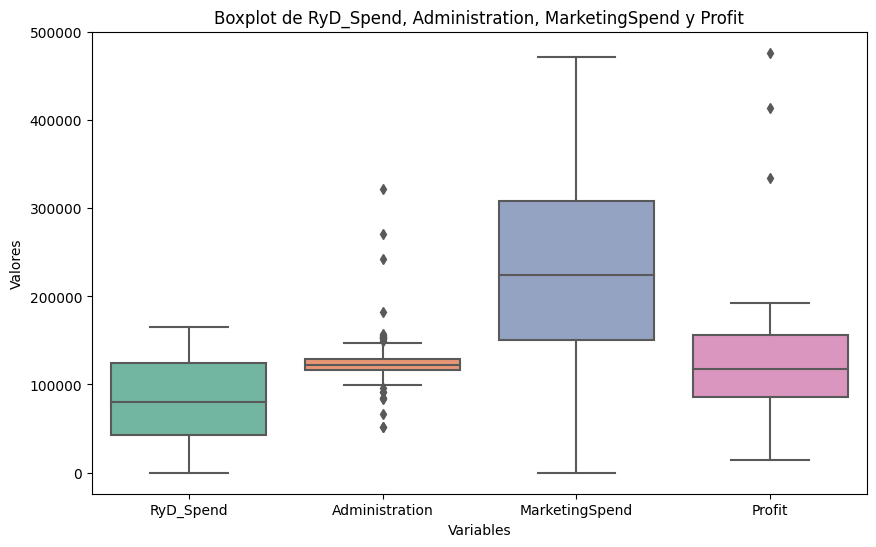

In [15]:


columnas = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']

# Creamos un subconjunto del DataFrame con las columnas seleccionadas.
subset_df = df[columnas]

# Creamos un boxplot para las columnas seleccionadas.
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, orient="v", palette="Set2")
plt.title("Boxplot de RyD_Spend, Administration, MarketingSpend y Profit")
plt.ylabel("Valores")
plt.xlabel("Variables")

# Mostramos el gráfico.
plt.show()


Actividad 2

In [16]:
## Aplicamos Robust Scaler porque es mas resistente a los outliers
from sklearn.preprocessing import RobustScaler

# Creamos una instancia de Robust Scaler.
robust_scaler = RobustScaler()

df = df.drop('State',axis=1)
# Aplicamos Robust Scaler.
df[columnas] = robust_scaler.fit_transform(df[columnas])

df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.021268,0.043388,0.010731,0.027353
std,0.571146,1.009241,0.582485,0.615916
min,-0.981039,-5.691791,-1.428047,-1.478591
25%,-0.452271,-0.462532,-0.467804,-0.455213
50%,0.000000,0.000000,0.000000,0.000000
75%,0.547729,0.537468,0.532196,0.544787
max,1.048259,15.940440,1.572738,5.153293


Mean Absolute Error: 0.035885095439105376
Mean SquaredError: 0.009700786187764805
RootMean SquaredError: 0.0984925692007514


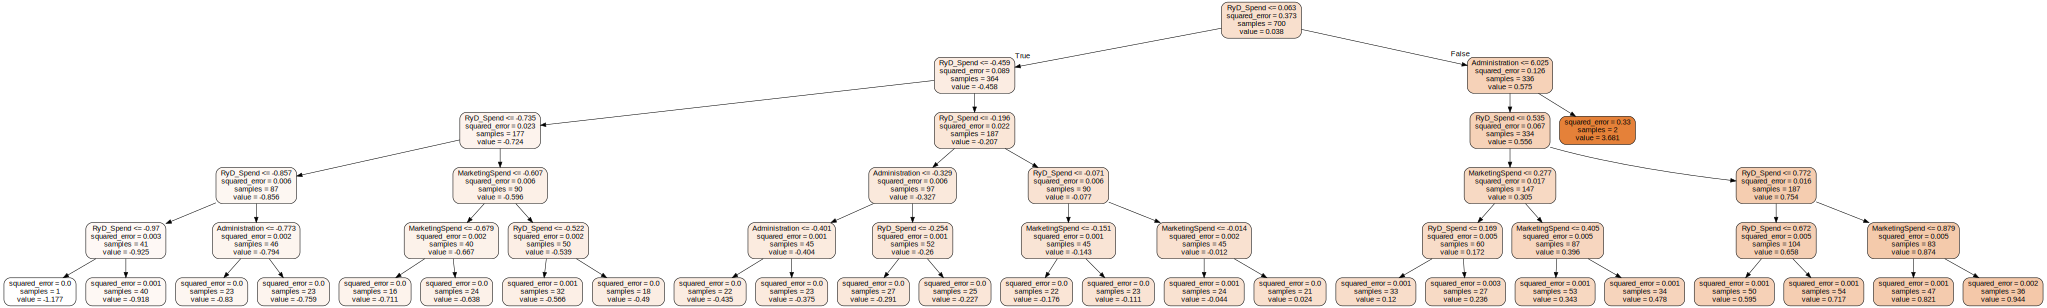

In [17]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from graphviz import Source
#Entrenamos y visualizamos el arbol de decisión de regresión
xCompanies = df.drop('Profit',axis=1)
yCompanies = df['Profit']

xCompaniesTrain, xCompaniesTest, yCompaniesTrain, yCompaniesReal = train_test_split(xCompanies, yCompanies, test_size=0.3)

tree_reg= DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13, min_samples_leaf=1, min_samples_split=10)

tree_reg.fit(xCompaniesTrain, yCompaniesTrain)

yCompaniesPred= tree_reg.predict(xCompaniesTest)

print('Mean Absolute Error:', metrics.mean_absolute_error(yCompaniesReal, yCompaniesPred))
print('Mean SquaredError:', metrics.mean_squared_error(yCompaniesReal, yCompaniesPred))
print('RootMean SquaredError:', np.sqrt(metrics.mean_squared_error(yCompaniesReal, yCompaniesPred)))

tableResult= pd.DataFrame({'Actual':yCompaniesReal, 'Predicted':yCompaniesPred})

export_graphviz(tree_reg, out_file="companies.dot", feature_names=xCompanies.columns,class_names=yCompanies, rounded=True, filled=True)
Source.from_file("companies.dot")

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Creamos una instancia del modelo DecisionTreeRegressor.
modelo_arbol = DecisionTreeRegressor()

# Realizamos la validación cruzada con 5 divisiones
scores = cross_val_score(modelo_arbol, xCompanies, yCompanies, cv=5, scoring='neg_mean_squared_error')

# En este caso, estamos utilizando el error cuadrático medio negativo (neg_mean_squared_error).

# Calculamos el error cuadrático medio promedio (MSE) y lo convierte en positivo.
mse_promedio = -scores.mean()

# Imprimimos el resultado.
print(f"Error cuadrático medio promedio: {mse_promedio}")

Error cuadrático medio promedio: 0.04756343588608789


Actividad 3

In [19]:


file_path= 'PokemonDB.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

### Vista de datos
df.head()

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [21]:
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [22]:
df.columns = df.columns.str.lower().str.replace('.', '').str.replace(' ', '_')

<ipython-input-22-91f43521c913>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace('.', '').str.replace(' ', '_')


In [23]:
df.head()

,name,type,hp,attack,defense,sp_atk,sp_def,speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


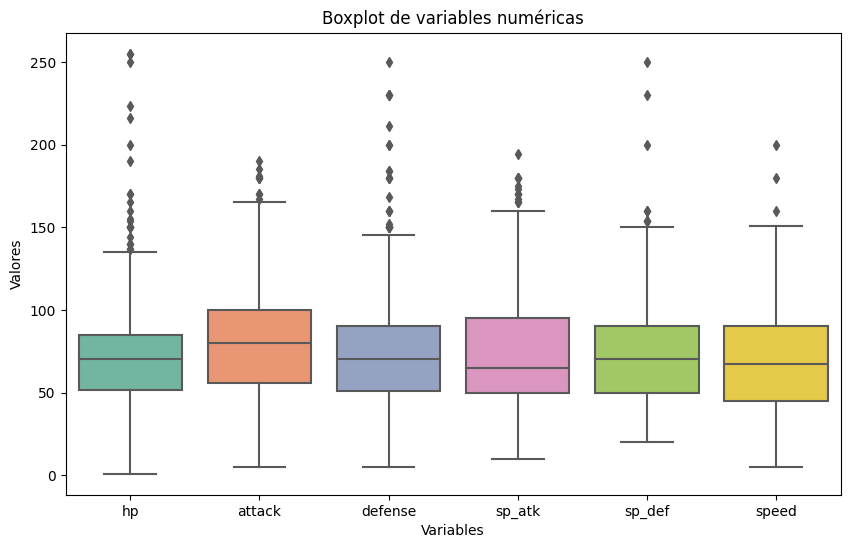

In [24]:

columnas = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

# Creamos un subconjunto del DataFrame con las columnas seleccionadas.
subset_df = df[columnas]

# Creamos un boxplot para las columnas seleccionadas.
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, orient="v", palette="Set2")
plt.title("Boxplot de variables numéricas")
plt.ylabel("Valores")
plt.xlabel("Variables")

# Mostramos el gráfico.
plt.show()

In [25]:
#Categorizamos las variables
columns = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

percentiles = [0, 0.33, 0.66, 1]  # Define los percentiles (0%, 33.33%, 66.67%, 100%)
labels = [1, 2, 3]  # Define las etiquetas de las categorías

for column in columns:
  percentile_values = df[column].quantile(percentiles)

    # Convierte los percentiles en puntos de corte
  bins = percentile_values.tolist()

    # Crea una nueva columna con las categorías
  df[column] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

In [26]:
df.head()

,name,type,hp,attack,defense,sp_atk,sp_def,speed
0,Bulbasaur,Grass,1,1,1,2,2,1
1,Ivysaur,Grass,1,1,2,2,2,2
2,Venusaur,Grass,3,2,3,3,3,2
3,Venusaur,Grass,3,3,3,3,3,2
4,Charmander,Fire,1,1,1,2,1,2


In [27]:
df.dtypes

name         object
type         object
hp         category
attack     category
defense    category
sp_atk     category
sp_def     category
speed      category
dtype: object

Actividad 4

In [28]:
X = df.drop(['type','name'], axis=1)
y = df['type']

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define los hiperparámetros que deseas ajustar
param_grid = {
    'max_depth': [2, 3, 4, 5],  # Valores de profundidad máxima a probar
    'min_samples_split': [2, 5, 10]  # Valores de min_samples_split a probar
}

# Crea el clasificador DecisionTree
clf = DecisionTreeClassifier(criterion='gini')

# Realiza la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')  # Puedes ajustar el número de divisiones (cv) y la métrica de puntuación según tus necesidades

# Ajusta el modelo con los hiperparámetros óptimos
grid_search.fit(X, y)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Imprime la mejor puntuación (exactitud en este caso)
print("Mejor puntuación (Exactitud):", grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'max_depth': 2, 'min_samples_split': 2}
Mejor puntuación (Exactitud): 0.15378151260504203


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
classes = clf.classes_


print("Clases:", classes)

Clases: ['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']


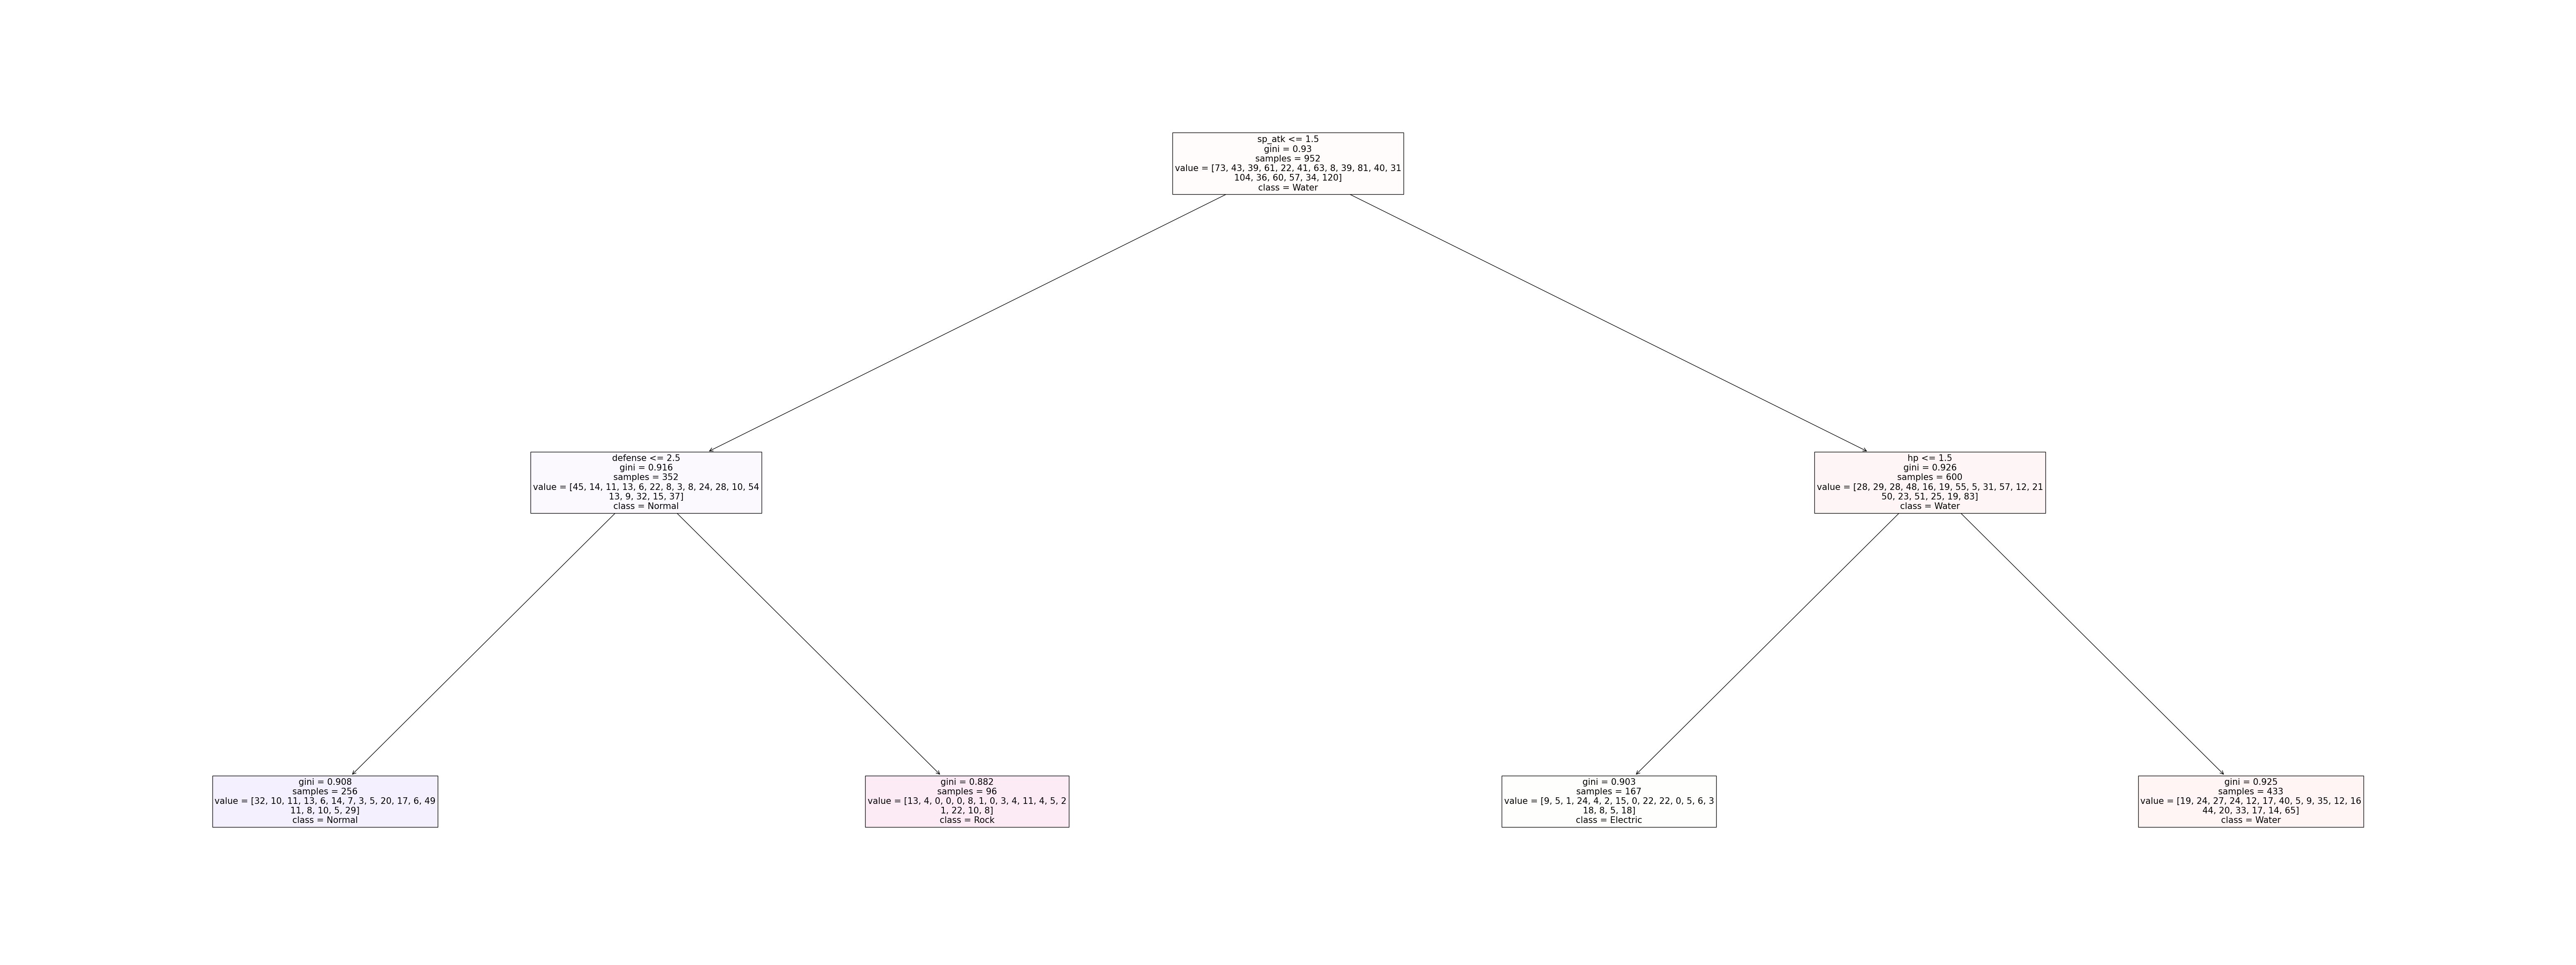

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 30))
plot_tree(clf, filled=True, feature_names=X.columns, class_names= classes,  fontsize=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Exactitud: 0.13865546218487396
Exhaustividad: 0.025684135552556605
Precisión: 0.07248474528168014
Matriz de confusión:


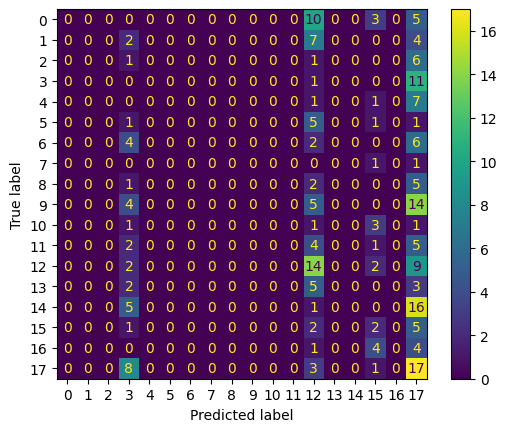

In [35]:
from sklearn import metrics
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


print(f'Exactitud: {accuracy}')
print(f'Exhaustividad: {precision}')
print(f'Precisión: {recall}')
print('Matriz de confusión:')
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}


clf = DecisionTreeClassifier(criterion='gini')


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)


print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


print("Mejor puntuación (Exactitud):", grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'max_depth': 2, 'min_samples_split': 2}
Mejor puntuación (Exactitud): 0.15378151260504203


Actividad 5

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score




label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['category']).columns:
    X[column] = label_encoder.fit_transform(X[column])


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=99)


naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)


y_pred1 = naive_bayes.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='weighted')
recall1 = recall_score(y_test1, y_pred1, average='weighted')


y_pred2 = naive_bayes.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2, average='weighted')
recall2 = recall_score(y_test2, y_pred2, average='weighted')


average_accuracy = (accuracy1 + accuracy2) / 2
average_precision = (precision1 + precision2) / 2
average_recall = (recall1 + recall2) / 2


print("Resultados en el primer conjunto de prueba:")
print(f"Precisión: {precision1}")
print(f"Exhaustividad: {recall1}")
print(f"Exactitud: {accuracy1}\n")

print("Resultados en el segundo conjunto de prueba:")
print(f"Precisión: {precision2}")
print(f"Exhaustividad: {recall2}")
print(f"Exactitud: {accuracy2}\n")

print(f"Exactitud promedio: {average_accuracy}")
print(f"Precisión promedio: {average_precision}")
print(f"Exhaustividad promedio: {average_recall}")

Resultados en el primer conjunto de prueba:
Precisión: 0.04265873015873016
Exhaustividad: 0.15126050420168066
Exactitud: 0.15126050420168066

Resultados en el segundo conjunto de prueba:
Precisión: 0.07985778926955397
Exhaustividad: 0.16806722689075632
Exactitud: 0.16806722689075632

Exactitud promedio: 0.15966386554621848
Precisión promedio: 0.06125825971414207
Exhaustividad promedio: 0.15966386554621848


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Actividad 6

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score





# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir diferentes valores para los parámetros
k_values = [ 5, 7, 9]
metric_values = ['euclidean', 'manhattan']
p_values = [1, 2]

# Iterar sobre las combinaciones de parámetros
for k in k_values:
    for metric in metric_values:
        for p in p_values:
            # Crear el clasificador k-NN
            knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p)

            # Entrenar el modelo con el conjunto de entrenamiento
            knn_classifier.fit(X_train, y_train)

            # Realizar predicciones en el conjunto de prueba
            y_pred = knn_classifier.predict(X_test)

            # Calcular métricas de evaluación
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            # Imprimir resultados para cada combinación de parámetros
            print(f"Parámetros: k={k}, metric={metric}, p={p}")
            print(f"Precisión: {precision}")
            print(f"Exhaustividad: {recall}")
            print(f"Exactitud: {accuracy}")
            print("="*40)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Parámetros: k=5, metric=euclidean, p=1
Precisión: 0.1069084718907806
Exhaustividad: 0.1134453781512605
Exactitud: 0.1134453781512605
Parámetros: k=5, metric=euclidean, p=2
Precisión: 0.1069084718907806
Exhaustividad: 0.1134453781512605
Exactitud: 0.1134453781512605
Parámetros: k=5, metric=manhattan, p=1
Precisión: 0.10692018742981063
Exhaustividad: 0.1134453781512605
Exactitud: 0.1134453781512605
Parámetros: k=5, metric=manhattan, p=2
Precisión: 0.10692018742981063
Exhaustividad: 0.1134453781512605
Exactitud: 0.1134453781512605
Parámetros: k=7, metric=euclidean, p=1
Precisión: 0.11761836823771835
Exhaustividad: 0.11764705882352941
Exactitud: 0.11764705882352941
Parámetros: k=7, metric=euclidean, p=2
Precisión: 0.11761836823771835
Exhaustividad: 0.11764705882352941
Exactitud: 0.11764705882352941
Parámetros: k=7, metric=manhattan, p=1
Precisión: 0.11490186713270545
Exhaustividad: 0.12184873949579832
Exactitud: 0.12184873949579832
Parámetros: k=7, metric=manhattan, p=2
Precisión: 0.114901

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning